### Empirical Method for business decisions - Data-driven optimization of Hill's marketing campaign​

# Waste estimation

In [2]:
# we import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# and the dataframes
cost = pd.read_csv('EMBD/project/data/final_detailed_data.csv')
cost.head()

,Unnamed: 0.1,Unnamed: 0,customer_id,date,event,sales,cost,Cluster,num_exposure
0,5821808,0,re000fIO9QXTWYjOfn,2024-01-24 14:25:56,Retargeting,NaN,3595.156,Heavy,1
1,2220659,3473802,re000fIO9QXTWYjOfn,2024-01-24 14:44:47,Add to cart,NaN,NaN,Heavy,1
2,2220655,3473798,re000fIO9QXTWYjOfn,2024-01-24 14:48:51,Product Page View,NaN,NaN,Heavy,1
3,2220657,3473800,re000fIO9QXTWYjOfn,2024-01-24 14:51:54,Order,31.92,NaN,Heavy,1
4,2220654,3473797,re000fIO9QXTWYjOfn,2024-01-24 14:55:03,Product Page View,NaN,NaN,Heavy,1


In [63]:
cost.shape, cost['customer_id'].nunique()

((9845305, 9), 789164)

The dataframe we'll be using has 9845305 lines for 789164 customers. This data retraces for each of those customers, the events (be it activity on websity or exposure to an add), their date, cost and sales.

In [4]:
# we initialize parameters based on previous analysis
# caping values
cap_heavy = 40
cap_medium = 20
cap_light = 10

In [5]:
# creating a cap value column for each customer type
cost.loc[cost['Cluster']=='Heavy','cap'] = cap_heavy
cost.loc[cost['Cluster']=='Medium','cap'] = cap_medium
cost.loc[cost['Cluster']=='Light','cap'] = cap_light
cost.head()

,Unnamed: 0.1,Unnamed: 0,customer_id,date,event,sales,cost,Cluster,num_exposure,cap
0,5821808,0,re000fIO9QXTWYjOfn,2024-01-24 14:25:56,Retargeting,NaN,3595.156,Heavy,1,40.0
1,2220659,3473802,re000fIO9QXTWYjOfn,2024-01-24 14:44:47,Add to cart,NaN,NaN,Heavy,1,40.0
2,2220655,3473798,re000fIO9QXTWYjOfn,2024-01-24 14:48:51,Product Page View,NaN,NaN,Heavy,1,40.0
3,2220657,3473800,re000fIO9QXTWYjOfn,2024-01-24 14:51:54,Order,31.92,NaN,Heavy,1,40.0
4,2220654,3473797,re000fIO9QXTWYjOfn,2024-01-24 14:55:03,Product Page View,NaN,NaN,Heavy,1,40.0


In [7]:
# in order to reduce the computation time we only keep the events we are interested in here (e.g. adds)
long_cost = cost.copy()
cost = cost[cost['event'].isin(['tv','Retargeting','Contextual'])]
print(f"From {len(long_cost)} to {len(cost)} lines.")

From 9845305 to 4023497 lines.


## Preliminary study of cost : 

How does the cost vary between customer, clusters, media and campaign type ?

In [8]:
cost['cost'].describe()

count    4.023497e+06
mean     8.028283e+02
std      8.881889e+02
min      1.083310e+02
25%      2.040590e+02
50%      4.140120e+02
75%      9.857710e+02
max      1.133500e+04
Name: cost, dtype: float64

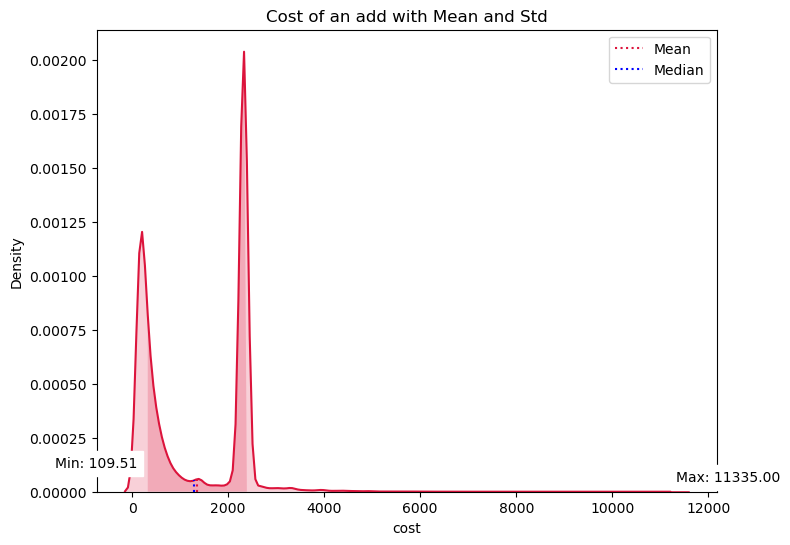

In [ ]:
# WARNING the code below doesn't load with this data set so we just put a graphic obtained with a smaller data set
x = cost['cost']
x_min = np.min(x)
x_max = np.max(x)
middle = np.mean(cost['cost'])
sdev = cost['cost'].std()
left = middle - sdev
right = middle + sdev

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# KDE plot
sns.kdeplot(x, fill=False, color='crimson', ax=ax)
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

# Plot mean and standard deviation
middle = x.mean()
sdev = x.std()
left = middle - sdev
right = middle + sdev

ax.vlines(middle, 0, np.interp(middle, xs, ys), color='crimson', ls=':', label='Mean')
ax.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='crimson', alpha=0.2)

# Plot median 
left_q, middle_q, right_q = np.percentile(x, [25, 50, 75])
ax.vlines(middle_q, 0, np.interp(middle_q, xs, ys), color='blue', ls=':', label='Median')

# Annotate the minimum and maximum values on the curve
min_y = np.interp(x_min, xs, ys)
max_y = np.interp(x_max, xs, ys)

ax.text(x_min, 0.0001, f'Min: {x_min:.2f}', fontsize=10, color='black', ha='right', va='bottom', backgroundcolor='white')
ax.text(x_max, 0.0001, f'Max: {x_max:.2f}', fontsize=10, color='black', ha='left', va='top', backgroundcolor='white')

# Titles and labels
ax.set_title('Cost of an add with Mean and Std')
ax.legend()

# Show the plot
plt.show()


c:\Users\guibe\anaconda3\envs\vscode\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\guibe\anaconda3\envs\vscode\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\guibe\anaconda3\envs\vscode\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Cost of an add depending on media and campaign type')

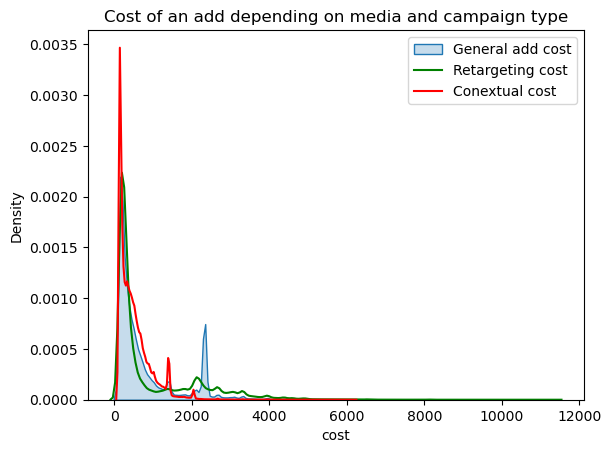

In [10]:
# cost for media types
sns.kdeplot(cost['cost'], fill=True, label='General add cost')
sns.kdeplot(cost[cost['event']=='Retargeting']['cost'], color='green', label='Retargeting cost')
sns.kdeplot(cost[cost['event']=='Contextual']['cost'], color='red', label='Conextual cost')
plt.legend()
plt.title('Cost of an add depending on media and campaign type')

In [ ]:
# cost for different clusters
cost.groupby('Cluster')['cost'].describe().reset_index()

,Cluster,count,mean,std,min,25%,50%,75%,max
0,Heavy,423745.0,1040.186847,1139.219591,108.393,223.1480,415.243,2124.438,10808.207
1,Light,2683055.0,712.521555,777.490769,108.406,194.6545,401.272,835.330,11335.000
2,Medium,916697.0,957.425007,1009.697665,108.331,225.4050,458.080,1535.047,11335.000


# First approach: average unit cost per client

$\frac{\sum_{i=1}^{n_i} cost_{ij}}{n_i}$, with $cost_{ij}$ the unit cost of add j for customer i 

In [ ]:
cost_agg2 = cost.groupby('customer_id')['cost'].sum().reset_index()
waste = cost[['customer_id','num_exposure','Cluster','cap']].merge(cost_agg2).drop_duplicates()
waste['unit_cost'] = waste['cost']/waste['num_exposure']
waste['waste_flag'] = (waste['cap'] < waste['num_exposure']).astype(int)
waste['waste_extend'] = waste['num_exposure'] / waste['cap']
print(f"There are {waste['waste_flag'].sum()} customers who saw more adds then their estimated cap values up to {waste['waste_extend'].max()} times more.")
print(f"The average of the unit cost is {waste['unit_cost'].mean()} milli cent ({waste['unit_cost'].std()}) ")
# let's finally compute the waste value per client and in total over the six months
waste['waste_value'] = waste.apply(lambda x : x['unit_cost']*(x['num_exposure'] - x['cap']) if x['waste_flag']==1 else 0, axis=1)
print(f"The average waste for the concerned customers amounts to {waste[waste['waste_flag']==1]['waste_value'].mean()/100000} dollars while the total waste represent {waste['waste_value'].sum()/100000}.")

There are 83334 customers who saw more adds then their estimated cap values up to 19.3 times more.
The average of the unit costs is 1352.58226378094 milli cent (1168.5526616394666) 
The average waste for the concerned customers amounts to 0.06984471632793983 dollars while the total waste represent 5820.439590472539.


In [13]:
# how much does this represent over the total media budget ? 
total_cost =waste['waste_value'].sum()/100000
media_cost = waste['cost'].sum()/100000
print(f"The waste represents {round((total_cost/media_cost)*100,1)} % of the total media cost, without accounting for the non monetary negative effect of over targeting")

The waste represents 18.0 % of the total media cost, without accounting for the non monetary negative effect of over targeting


## Second approach: averaging cost at group level

$\frac{\sum_{i \in C} \sum_{i=1}^{n_i} cost_i}{\sum_{i \in C} n_i}$

In [14]:
cluster_cost = waste.groupby('Cluster')[['cost', 'num_exposure']].sum().reset_index()
cluster_cost['cluster_unit_cost'] = cluster_cost['cost']/cluster_cost['num_exposure']
cluster_cost

,Cluster,cost,num_exposure,cluster_unit_cost
0,Heavy,4.407740e+08,423745,1040.186847
1,Light,1.911735e+09,2683055,712.521555
2,Medium,8.776686e+08,916697,957.425007


In [15]:
waste.loc[waste['Cluster']=='Heavy','cluster_unit_cost'] = cluster_cost[cluster_cost['Cluster']=='Heavy']['cluster_unit_cost'].iloc[0]
waste.loc[waste['Cluster']=='Medium','cluster_unit_cost'] = cluster_cost[cluster_cost['Cluster']=='Medium']['cluster_unit_cost'].iloc[0]
waste.loc[waste['Cluster']=='Light','cluster_unit_cost'] = cluster_cost[cluster_cost['Cluster']=='Light']['cluster_unit_cost'].iloc[0]
waste.head()

,customer_id,num_exposure,Cluster,cap,cost,unit_cost,waste_flag,waste_extend,waste_value,cluster_unit_cost
0,re000fIO9QXTWYjOfn,1,Heavy,40.0,3595.156,3595.156000,0,0.025,0.000000,1040.186847
1,re000pHbVOysCXRHgt,1,Heavy,40.0,1863.549,1863.549000,0,0.025,0.000000,1040.186847
2,re001dfhF1iIFRre85,14,Light,10.0,6868.310,490.593571,1,1.400,1962.374286,712.521555
16,re00256gMWh8xlBxJn,2,Medium,20.0,6250.698,3125.349000,0,0.100,0.000000,957.425007
18,re002BI64EJvXZLhyr,1,Heavy,40.0,1709.303,1709.303000,0,0.025,0.000000,1040.186847


In [16]:
waste_cluster = waste.apply(lambda x : x['cluster_unit_cost']*(x['num_exposure'] - x['cap']) if x['waste_flag']==1 else 0, axis=1)
print(f"The average waste amounts to {waste_cluster.sum()/100000}.")

The average waste amounts to 7523.49392048769.


In [17]:
# how much does this represent over the total media budget ? 
total_cost = waste_cluster.sum()/100000
media_cost = waste['cost'].sum()/100000
print(f"The waste represents {round((total_cost/media_cost)*100,1)} % of the total media cost, without accounting for the non monetary negative effect of over targeting")


The waste represents 23.3 % of the total media cost, without accounting for the non monetary negative effect of over targeting


# Third approach : exact costs

$cost_{ij} $ for j $\geq c_i$

In [18]:
# we sort the data frame by date and introduce a variable that counts the number of exposure over time
cost3 = cost.sort_values(['customer_id','date'])
cost3['count_exposure'] = cost3.groupby('customer_id').cumcount() + 1
cost3.head(20)

,Unnamed: 0.1,Unnamed: 0,customer_id,date,event,sales,cost,Cluster,num_exposure,cap,count_exposure
0,5821808,0,re000fIO9QXTWYjOfn,2024-01-24 14:25:56,Retargeting,NaN,3595.156,Heavy,1,40.0,1
28,5821809,1,re000pHbVOysCXRHgt,2024-01-01 18:30:47,Retargeting,NaN,1863.549,Heavy,1,40.0,1
43,5821810,2,re001dfhF1iIFRre85,2024-03-22 20:43:51,Contextual,NaN,484.667,Light,14,10.0,1
44,5821811,3,re001dfhF1iIFRre85,2024-03-23 20:30:10,Contextual,NaN,1376.370,Light,14,10.0,2
45,5821812,4,re001dfhF1iIFRre85,2024-03-26 07:25:09,Contextual,NaN,476.618,Light,14,10.0,3
46,5821813,5,re001dfhF1iIFRre85,2024-03-27 12:37:31,Contextual,NaN,191.614,Light,14,10.0,4
47,5821814,6,re001dfhF1iIFRre85,2024-03-28 10:33:59,Contextual,NaN,255.263,Light,14,10.0,5
48,5821815,7,re001dfhF1iIFRre85,2024-03-29 17:06:09,Contextual,NaN,300.369,Light,14,10.0,6
49,5821816,8,re001dfhF1iIFRre85,2024-04-04 00:29:42,Contextual,NaN,259.063,Light,14,10.0,7
50,5821817,9,re001dfhF1iIFRre85,2024-04-05 01:07:43,Contextual,NaN,357.961,Light,14,10.0,8


In [19]:
# now we introduce a flag variable that checks if the cap value was exceeded
cost3['waste_flag'] = (cost3['cap'] < cost3['num_exposure']).astype(int)
#we indeed get the same number of customers concerned as with the first approach
over_adv = (cost3.groupby('customer_id')['waste_flag'].sum()!=0).sum()
print(f"There are {over_adv} customers who saw more adds then their estimated cap values ({(over_adv/cost3['customer_id'].nunique())*100} %).")

There are 83334 customers who saw more adds then their estimated cap values (10.559782250584163 %).


In [20]:
# let's calculate the precise waste value
cost3['waste_value'] = np.where(cost3['waste_flag'] == 1, cost3['cost'], 0)
print(f"The average waste for the conserned customers amounts to {(cost3[cost3['waste_flag']==1].groupby('customer_id')['waste_value'].sum()).mean()/100000} dollars while the total waste represent {cost3['waste_value'].sum()/100000}.")

The average waste for the conserned customers amounts to 0.13524969895756833 dollars while the total waste represent 11270.89841293001.


In [21]:
# how much does this represent over the total media budget ? 
total_cost =cost3['waste_value'].sum()/100000
media_cost = cost3['cost'].sum()/100000
print(f"The waste represents {round((total_cost/media_cost)*100,1)} % of the total media cost, without accounting for the non monetary negative effect of over targeting")

The waste represents 34.9 % of the total media cost, without accounting for the non monetary negative effect of over targeting


## Inference : estimation of expected waste reduction on the whole data base

### Method 1 : using an estimation on the number of customers in total

In [24]:
# Let's say Hill has at least 5M customers
nb_clients = 5000000
# it is approximately 6 times more than in our data set
size_ratio = nb_clients/cost['customer_id'].nunique()
# taking the results from before (waste between 6000 and 11000 dollars)
waste = 6000
expected_waste1 = size_ratio*waste
print(f"There {size_ratio} more customers in the 'real' data set so doing a simple cross product we can estimate the waste to around {expected_waste1} dollars")

There 6.335818663801187 more customers in the 'real' data set so doing a simple cross product we can estimate the waste to around 38014.91198280712 dollars


### Method 2 : in probability

\begin{equation*}
    E(waste) = N_C \sum_{c \in C} cost_c n_c p_{waste,c}
\end{equation*}

$N_C$ the number of clients in cluster C approximated with $N_C = p_c * N$ with N the total number of clients (~5M) and $p_c$ the proportion of cluster C customers in the database (presumably (0,1 - 0,4 - 0,5))

$n_C$ the average number of adds sent to a customer in group C.

$cost_C$ the average cost of an add in cluster C.

$p_{waste,C}$ the proportion of an wasted add in cluster C.



In [ ]:
size_heavy = 112143
size_medium = 214043
size_light = 462978
# as we can see : 
cost3.groupby('Cluster')['customer_id'].nunique()

Cluster
Heavy     112143
Light     462978
Medium    214043
Name: customer_id, dtype: int64

In [27]:
# probability of over advertising per cluster
nb_waste = (cost3.groupby('customer_id')['waste_flag'].sum()!=0).sum()
prop_waste = nb_waste/cost['customer_id'].nunique()
heavy_waste = (cost3[cost3['Cluster']=='Heavy'].groupby('customer_id')['waste_flag'].sum()!=0).sum() / size_heavy
medium_waste = (cost3[cost3['Cluster']=='Medium'].groupby('customer_id')['waste_flag'].sum()!=0).sum() / size_medium
light_waste = (cost3[cost3['Cluster']=='Light'].groupby('customer_id')['waste_flag'].sum()!=0).sum() /  size_light # most of the over advertised customers are light
prop_waste, heavy_waste, medium_waste, light_waste

(0.10559782250584163,
 0.003005091713258964,
 0.036174974187429626,
 0.16254336059164798)

In [28]:
# average unit cluster cost 
heavy_cost = cluster_cost[cluster_cost['Cluster']=='Heavy']['cluster_unit_cost'].iloc[0]
medium_cost = cluster_cost[cluster_cost['Cluster']=='Medium']['cluster_unit_cost'].iloc[0]
light_cost = cluster_cost[cluster_cost['Cluster']=='Light']['cluster_unit_cost'].iloc[0]
heavy_cost,medium_cost, light_cost

(1040.1868474837463, 957.4250074419356, 712.5215545067097)

In [29]:
# size of the cluster (in proportion) using the customer segmentation's conclusions
heavy_ratio = 0.15
medium_ratio = 0.28
light_ratio = 0.56

In [30]:
# average number of add sent per customer
heavy_add = 423748 / size_heavy
medium_add = 916698 / size_medium
light_add = 2683061/ size_light
# as we can see
cost3.groupby('Cluster')['event'].count()

Cluster
Heavy      423745
Light     2683055
Medium     916697
Name: event, dtype: int64

In [32]:
# expected cost : 
expected_waste2 = heavy_ratio*nb_clients*heavy_waste*heavy_cost*heavy_add + medium_ratio*nb_clients*medium_waste*medium_cost*medium_add + light_ratio*nb_clients*light_waste*light_cost*light_add
print(f"Using this second method, we get an estimation of {expected_waste2/100000} dollars")

Using this second method, we get an estimation of 20958.22231887909 dollars


## Waste evolution with cap values

In [33]:
# let's define a function that takes cap values and returns waste (first approach)
def waste1(data, c1,c2,c3) : 
    # allocate cap values to cluster
    data.loc[data['Cluster']=='Heavy','cap'] = c1
    data.loc[data['Cluster']=='Medium','cap'] = c2
    data.loc[data['Cluster']=='Light','cap'] = c3
    # 
    cost_agg = data.groupby('customer_id')['cost'].sum().reset_index()
    waste = data[['customer_id','num_exposure','Cluster','cap']].merge(cost_agg2).drop_duplicates()
    waste['unit_cost'] = waste['cost']/waste['num_exposure']
    waste['waste_flag'] = (waste['cap'] < waste['num_exposure']).astype(int)
    waste['waste_value'] = waste.apply(lambda x : x['unit_cost']*(x['num_exposure'] - x['cap']) if x['waste_flag']==1 else 0, axis=1)
    total_waste = waste['waste_value'].sum()/100000
    budget = waste['cost'].sum()/100000
    return round(total_waste,2), round((total_waste/budget)*100,2)

In [35]:
test = cost.copy()
waste1(test,30,20,10), waste1(test,40,30,20), waste1(test,50,40,30), waste1(test,60,50,40)

((5859.02, 18.14), (2512.02, 7.78), (1179.28, 3.65), (582.53, 1.8))

In [36]:
# what if we used the same caping value ?
for i in range(10,50,5):
    print(f'{i} : ', waste1(test,i,i,i))

10 :  (7231.8, 22.39)
15 :  (4608.49, 14.27)
20 :  (3015.69, 9.34)
25 :  (2034.81, 6.3)
30 :  (1409.13, 4.36)
35 :  (989.72, 3.06)
40 :  (701.52, 2.17)
45 :  (500.25, 1.55)


# Expected sales reduction


### MEthod 1: 

Let $d_i$ the threshold date such that $c_i = n_i$, we want to calculate $\sum_{i=1}^N sales_{ij}$ s.t $d_j \geq d_i$

In [37]:
# det customer id of those whose caping value was exceed and date of threshold
sales_red = cost3[(cost3['waste_flag']!=0) & (cost3['count_exposure']==cost3['cap'])][['customer_id','date']]
sales_red.columns = ['customer_id','threshold_date']
sales_red

,customer_id,threshold_date
52,re001dfhF1iIFRre85,2024-04-08 13:48:35
222,re005cMgWIsrKLI9Yc,2024-03-09 20:22:52
441,re008pPsDZTIDQDrNi,2024-02-14 01:55:48
498,re009OJiALn7OwZElE,2024-01-14 05:10:51
539,re00AFMuixrsyTbFpP,2024-01-24 13:25:45
...,...,...
9844780,rezzjPtSLY2A4A9bss,2024-05-21 06:42:06
9844803,rezzjbm7UJKfmgEjyq,2024-03-21 01:45:10
9844892,rezzmsYdSMZiZmwEvh,2024-02-06 00:55:49
9845009,rezzrANJNxRgBLSngs,2024-01-26 21:52:12


In [41]:
# We merge to get the customer orders details and keep only the events after the threshold date
sales_red = sales_red.merge(long_cost[long_cost['event']=='Order'],on='customer_id')
sales_red = sales_red[sales_red['date'] >sales_red['threshold_date']]
sales_red.head()

,customer_id,threshold_date,Unnamed: 0.1,Unnamed: 0,date,event,sales,cost,Cluster,num_exposure,cap
2,re00P7bn7CLRbBVyKs,2024-01-27 17:15:43,4963531,8174346,2024-03-18 00:56:48,Order,22.49,NaN,Medium,25,20.0
3,re00sGmI6sTBf5LWEY,2024-02-27 03:32:45,238002,352223,2024-03-08 19:22:50,Order,58.99,NaN,Medium,46,20.0
4,re00sGmI6sTBf5LWEY,2024-02-27 03:32:45,238011,352232,2024-03-23 01:24:13,Order,57.99,NaN,Medium,46,20.0
11,re03XmZDthaTHYjHvC,2024-02-13 18:38:34,2779805,4367237,2024-05-25 21:53:23,Order,49.99,NaN,Medium,21,20.0
14,re0739jQ7Ab0YN4QOf,2024-01-22 01:23:56,4510213,7343516,2024-03-15 20:54:31,Order,55.99,NaN,Medium,24,20.0


In [42]:
reduction = sales_red['sales'].sum()
print(f"The sales reduction caused by the caping values is {reduction} $")

The sales reduction caused by the caping values is 203483.47000000003 $


### Method 2: in probability

$\sum_{c \in C} p_{c, (conversion | d_j \geq d_i)} \hat{sales_c}$

In [43]:
# to get the over advertised customers and their cluster
over_adv = cost3[(cost3['waste_flag']!=0) & (cost3['count_exposure']==cost3['cap'])][['customer_id']]
over_adv = over_adv.merge(cost3[['customer_id','Cluster']]).drop_duplicates()
over_adv

,customer_id,Cluster
0,re001dfhF1iIFRre85,Light
14,re005cMgWIsrKLI9Yc,Medium
61,re008pPsDZTIDQDrNi,Light
83,re009OJiALn7OwZElE,Light
115,re00AFMuixrsyTbFpP,Light
...,...,...
1936339,rezzjPtSLY2A4A9bss,Light
1936360,rezzjbm7UJKfmgEjyq,Light
1936377,rezzmsYdSMZiZmwEvh,Light
1936395,rezzrANJNxRgBLSngs,Light


In [51]:
# probability of conversion after threshold date per cluster
nb_conv = sales_red['customer_id'].nunique()/len(over_adv)
idx = over_adv['customer_id'].values
conv_cluster = sales_red[sales_red['customer_id'].isin(idx)]
heavy_conv = len(conv_cluster[conv_cluster['Cluster']=='Heavy'].drop_duplicates('customer_id'))/len(over_adv[over_adv['Cluster']=='Heavy'])
medium_conv = len(conv_cluster[conv_cluster['Cluster']=='Medium'].drop_duplicates('customer_id'))/len(over_adv[over_adv['Cluster']=='Medium'])
light_conv = len(conv_cluster[conv_cluster['Cluster']=='Light'].drop_duplicates('customer_id'))/len(over_adv[over_adv['Cluster']=='Light'])
nb_conv, heavy_conv, medium_conv, light_conv

(0.026123791009671923,
 0.9258160237388724,
 0.2192948469585432,
 0.0022191511414675633)

In [52]:
# average cart pert cluster (in general)
avg_cart = long_cost.copy()
avg_cart_heavy = (avg_cart[avg_cart['Cluster']=='Heavy'].groupby('customer_id')['sales'].sum()).sum()/(avg_cart[avg_cart['Cluster']=='Heavy'].groupby('customer_id')['sales'].sum()!=0).sum()
avg_cart_medium = (avg_cart[avg_cart['Cluster']=='Medium'].groupby('customer_id')['sales'].sum()).sum()/(avg_cart[avg_cart['Cluster']=='Medium'].groupby('customer_id')['sales'].sum()!=0).sum()
avg_cart_light = (avg_cart[avg_cart['Cluster']=='Light'].groupby('customer_id')['sales'].sum()).sum()/(avg_cart[avg_cart['Cluster']=='Light'].groupby('customer_id')['sales'].sum()!=0).sum()
avg_cart_heavy, avg_cart_medium, avg_cart_light

(199.2480874419268, 83.07821505232539, 26.573413673450247)

In [54]:
#propability of being over advertised
over_heavy = len(over_adv[over_adv['Cluster']=='Heavy'])/5775
over_medium = len(over_adv[over_adv['Cluster']=='Medium'])/10218
over_light = len(over_adv[over_adv['Cluster']=='Light'])/19395
over_heavy, over_medium, over_light

(0.058354978354978354, 0.7577803875513799, 3.880072183552462)

In [55]:
# expected reduction
ex_reduction = heavy_ratio*nb_clients*avg_cart_heavy*heavy_conv*over_heavy + medium_ratio*nb_clients*avg_cart_medium*medium_conv*over_medium + light_ratio*nb_clients*avg_cart_light*light_conv*over_light
ex_reduction

28042098.3939905

In [56]:
#here we have 
heavy_ratio*700000*avg_cart_heavy*heavy_conv*over_heavy + medium_ratio*700000*avg_cart_medium*medium_conv*over_medium + light_ratio*700000*avg_cart_light*light_conv*over_light

3925893.77515867

## Too few adds for some customers ?

In [ ]:
# introduce measure of how much lower the number of adds sent is from the caping value
# we consider too low if number of add sent is lower than the caping value of the cluster below 
# (e.g we are only interested in the most profitabl cstomers, medium and heavy)

In [58]:
opti_add = cost[cost['Cluster'].isin(['Heavy','Medium'])].copy()
def low_add(x):
    cap_medium = 30
    cap_light = 20
    flag = 0
    if x['Cluster']=='Heavy' :
        if x['num_exposure'] < cap_medium : 
            flag = 1
    if x['Cluster']=='Medium' : 
        if x['num_exposure'] < cap_light : 
            flag = 1
    return flag

opti_add['low_adv_flag'] = opti_add.apply(lambda x : low_add(x), axis=1)
opti_add

,Unnamed: 0.1,Unnamed: 0,customer_id,date,event,sales,cost,Cluster,num_exposure,cap,low_adv_flag
0,5821808,0,re000fIO9QXTWYjOfn,2024-01-24 14:25:56,Retargeting,NaN,3595.156,Heavy,1,40.0,1
28,5821809,1,re000pHbVOysCXRHgt,2024-01-01 18:30:47,Retargeting,NaN,1863.549,Heavy,1,40.0,1
59,5821824,16,re00256gMWh8xlBxJn,2024-05-07 02:58:42,Retargeting,NaN,3310.000,Medium,2,20.0,1
64,5821825,17,re00256gMWh8xlBxJn,2024-05-27 17:41:44,Retargeting,NaN,2940.698,Medium,2,20.0,1
71,5821826,18,re002BI64EJvXZLhyr,2024-02-27 22:48:23,Retargeting,NaN,1709.303,Heavy,1,40.0,1
...,...,...,...,...,...,...,...,...,...,...,...
9845227,9845282,4023484,rezzxDmygQV4OoBFA8,2024-03-07 01:45:49,Retargeting,NaN,557.175,Heavy,9,40.0,1
9845245,9845287,4023489,rezzxrPFWJvugyHGNt,2024-05-23 11:16:09,Retargeting,NaN,1961.659,Medium,1,20.0,1
9845255,9845288,4023490,rezzy9WDlKKXpU2czE,2024-02-03 21:35:08,Retargeting,NaN,2698.591,Medium,1,20.0,1
9845267,9845289,4023491,rezzy9gd2vJOezrAWg,2024-06-19 05:19:36,Retargeting,NaN,339.680,Medium,1,20.0,1


In [59]:
print(f"there are {(opti_add.groupby('customer_id')['low_adv_flag'].sum()!=0).sum()} customers treated as if they belonged to the below cluster out of {len(opti_add.drop_duplicates(subset=['customer_id']))}")

there are 316755 customers treated as if they belonged to the below cluster out of 326186
